# **California House Price**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

**Context**

California is a state in the Western United States. California borders Oregon to the north, Nevada and Arizona to the east, the Mexican state of Baja California to the south; and has a coastline along the Pacific Ocean to the west. With over 39.5 million residents across a total area of approximately 163,696 square miles (423,970 km2), it is the most populous and the third-largest U.S. state by area. It is also the most populated subnational entity in North America and the 34th most populous in the world. The Greater Los Angeles area and the San Francisco Bay Area are the nation's second and fifth most populous urban regions respectively, with the former having more than 18.7 million residents and the latter having over 9.6 million. Sacramento is the state's capital, while Los Angeles is the most populous city in the state and the second most populous city in the country (after New York City). Los Angeles County is the country's most populous, while San Bernardino County is the largest county by area in the country (Alaska has some larger subdivisions, but they are not called counties). San Francisco, which is both a city and a county, is the second most densely populated major city in the country (after New York City) and the fifth most densely populated county in the country, behind four of New York City's five boroughs.

**Problem Statement**

Housing Is More Expensive in California Than Just About Anywhere Else. Home prices in California are much higher than they are in other large states. (Among all states, only Hawaii is more expensive, on average, than California.) As of early–2015, the typical California home cost USD 437,000, more than double the typical U.S. home (USD179,000). California renters also face higher costs. In 2013, median monthly in California was $1,240, nearly 50 percent more than the national average.

**Goals**

From this situation, we're going to create tool that could predict housing price in California. I hope this tool could help stakeholder which is to decide the right price to sell and maybe help Investor to plan their investing activities for the future. Below are the example of the stakeholders whom could use this data for :</br>
- Agents / Valuers could use this model to determine the housing price
- Developers could use this model to predict whether their construction is profitable or not
- Investors could use this model to plant their investment activities
- Bankers / lenders could use this model to determine credit risk to lend to the developers
- Government could use this model to help them consider whether any regulation should be implemented or not

**Analytic Approach**

We will analyze the data to find a pattern that could differ each property by its own. Then we will build a Regression Model that could help stakeholders to predict a price by the property feature.

**Metric Evaluation**

The evaluation metrics that we use are RMSE, MAE, and MAPE, where RMSE is the square root of the mean of the square of all of the error, MAE is a measure of errors between paired observations expressing the same phenomenon, while MAPE are the averge error that the model create.</br></br>
The reason we use this metrics because it is generally best used metrics in regression due to it's easier to intepret and explained and good with normally distributed data, since we're also using normal distribution data.</br></br>
Meanwhile, we could also use R-squared or adj. R-squared if the final model choosen are the linear model. R-squared are used to explain how good the model explain the overall variance from the data. But this metric are not valid for the non-linear model.

## **Data Understanding**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west |
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housing_median_age | Float | Median age of a house within a block; a lower number is a newer building |
| total_rooms | Float | Total number of rooms within a block |
| total_bedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| median_income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| ocean_proximity | Object | Location of the house w.r.t ocean/sea |
| median_house_value | Float | Median house value for households within a block (measured in US Dollars) |

In [1]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df=pd.read_csv(r"C:\Users\62821\File\data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### **Exploratory Data Analysis**

**Distribution of NYC Airbnb price**

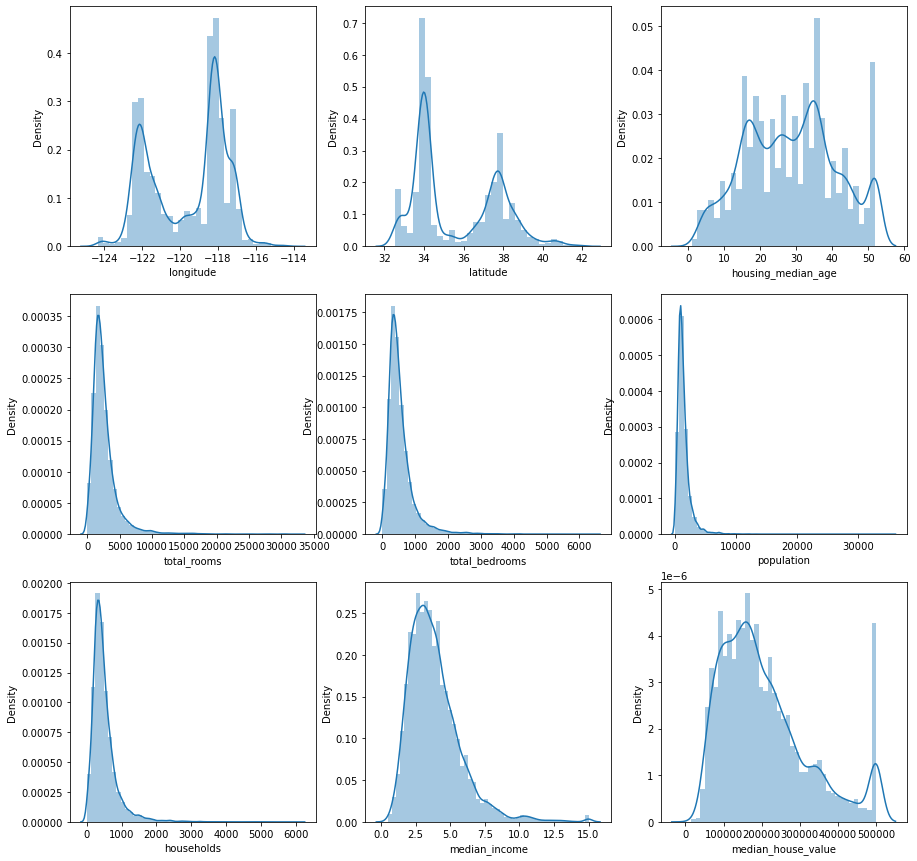

In [3]:
plt.figure(figsize=(15,15))
for i, column in enumerate(df.drop("ocean_proximity",axis=1).columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])

From the plot above, feature total_rooms, total_bedrooms, population, households, median_income, and median_house_value are positive skewed. Meanwhile feature longitude, latitude, housing_median_age distribution are vary.

In [4]:
df["ocean_proximity"].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

**Types of property related to price**

In [5]:
# Check number of property by its ocean proximity

df["ocean_proximity"].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

Most of properties are located not too far from Ocean

In [6]:
# Check median house value by each ocean proximity

df_median_price = df.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('ocean_proximity')
df_median_price = df_median_price.sort_values('median_house_value', ascending =False)
df_median_price.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


The closer the properties to the ocean, the more expensive it is.

Text(0.5, 1.0, 'Location based on its ocean proximity')

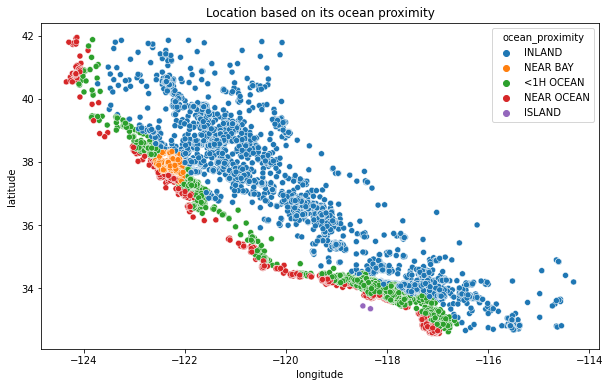

In [7]:
# location plot 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title("Location based on its ocean proximity")

Majority of the property are located not too far from ocean. This could indicate that most of people prefer to live closer to ocean rather than Inland.

### **Data Preprocessing**

In this process, we will perform data cleaning for the better analyze result. At this process, I'll:
- Drop a one or more feature that have a little relevance for the problem.
- Treat the missing value if any. By dropping the feature if needed or manipulate the value by its each own problem.

For preprocessing purpose, we will create duplicate from the dataframe used.

In [8]:
# Duplicate dataframe

df_model = df.copy()

In [9]:
# Check detailed info for each feature
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.67, -117.63]"
1,latitude,float64,0,0.00,836,"[35.78, 32.8]"
2,housing_median_age,float64,0,0.00,52,"[46.0, 17.0]"
3,total_rooms,float64,0,0.00,5227,"[1482.0, 3857.0]"
4,total_bedrooms,float64,137,0.95,1748,"[39.0, 495.0]"
5,population,float64,0,0.00,3498,"[3160.0, 769.0]"
6,households,float64,0,0.00,1649,"[1165.0, 874.0]"
7,median_income,float64,0,0.00,9797,"[3.4514, 5.7059]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, INLAND]"
9,median_house_value,float64,0,0.00,3548,"[401900.0, 446200.0]"


We found that there are some missing value in feature "total_bedrooms". But since the amount are below 1% from total population. we will fill the missing value with median because the data has some outliers.

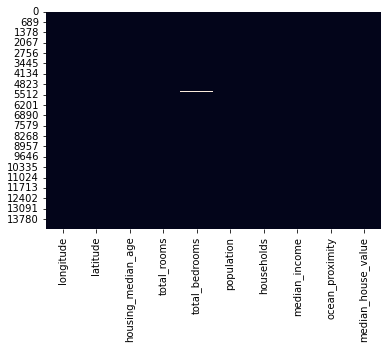

In [10]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Since the missing value are too small, we're going to fill the missing value with Simple Imputer median method. We also checked whether there is duplicate value and confirm that there is none.

In [11]:
# check duplicates

df_model.duplicated().sum()

0

In [12]:
# import library

from sklearn.impute import SimpleImputer

In [13]:
# fill missing value

simple_impute=SimpleImputer(strategy="median")
df_model[["total_bedrooms"]]=simple_impute.fit_transform(df[["total_bedrooms"]])

In [14]:
# check dataset info

df_model.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [15]:
# Descriptive analytic for numerical feature

num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


After doing some descriptive analytic on numerical value, we can conclude that there was no unusual value.
longitude has a negative value since it's explaining location, while there are no exception in other feature.

**Data Correlation**

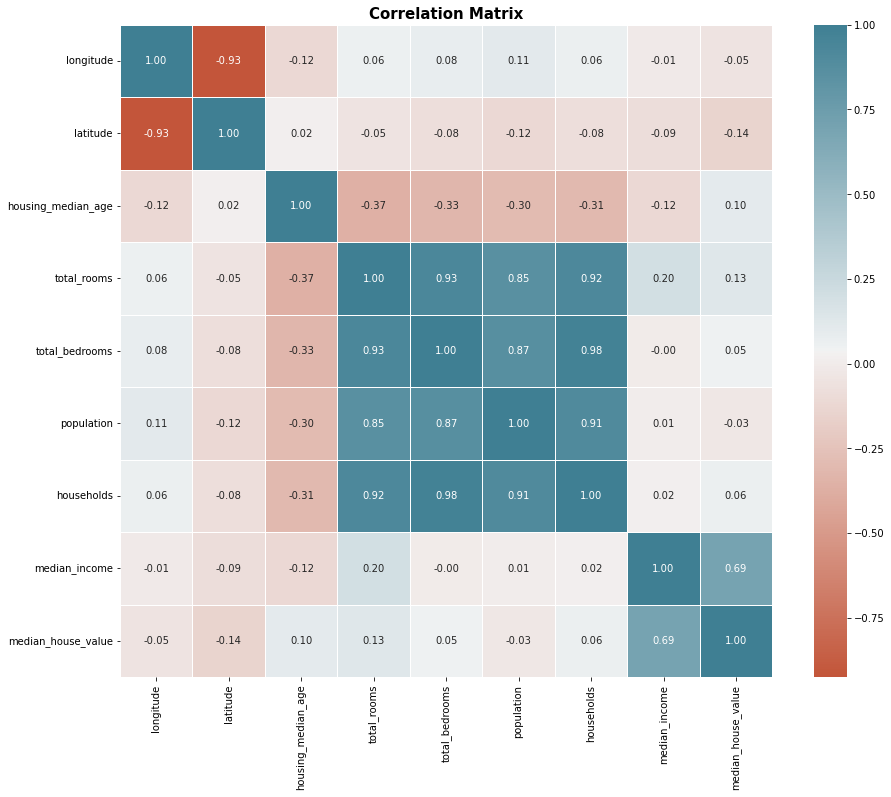

In [16]:
# Correlation matrix

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Feature "median_income" has a high correlation to median_house_value because the higher the income, the better the house price is. 

We will also check the data and outliers distribution for each numerical feature. If the distribution have high skewness, we will manipulate some data to make a better model.

**Outliers Detection**

Too many outliers in the data will impact the analysis and modeling significantly. There are so much consideration before we decide how to treat the data. We will check each feature nature and treat it by its each feature.

<AxesSubplot:>

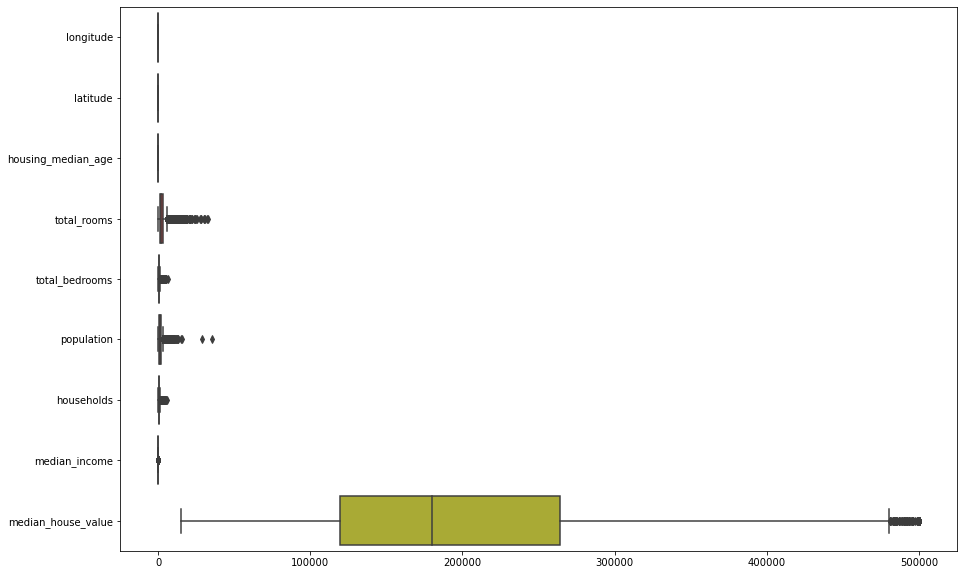

In [17]:
# Boxplot to check outliers

plt.figure(figsize=(15,10))
sns.boxplot(data=df_model,orient="h")

There are so much outliers in each feature. We need to clean some of outliers to make a better model, since our purpose in this project is to make model that could predict accurately in certain range of data. We will also alter some data in each feature by considering the combination from IQR method and the nature of the data. The model will limited to predict new listing only if the data in the range of this "clean dataset". If the listing value are outside this "clean dataset", the prediction result will be bias.

In [18]:
# Function to check outliers

def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    bot_limit = q1 - limit
    up_limit = q3 + limit
    print(f'bottom limit: {bot_limit}')
    print(f'upper limit: {up_limit}')       

In [19]:
# Feature total_rooms outliers

find_anomalies(df_model['total_rooms'])

IQR: 1697.0
bottom limit: -1094.5
upper limit: 5693.5


In [20]:
# Feature total_bedrooms outliers

find_anomalies(df_model['total_bedrooms'])

IQR: 349.0
bottom limit: -227.5
upper limit: 1168.5


In [21]:
# Feature population outliers

find_anomalies(df_model['population'])

IQR: 940.0
bottom limit: -626.0
upper limit: 3134.0


In [22]:
# Feature households outliers

find_anomalies(df_model['households'])

IQR: 325.0
bottom limit: -208.5
upper limit: 1091.5


In [23]:
# Feature median_house_value outliers

find_anomalies(df_model['median_house_value'])

IQR: 144300.0
bottom limit: -96850.0
upper limit: 480350.0


Next, we will do feature engineering to each numerical feature.

**Total Rooms**

In [24]:
# Statistic Description in total_rooms

df_model['total_rooms'].describe()

count    14448.000000
mean      2640.132683
std       2191.612441
min          2.000000
25%       1451.000000
50%       2125.000000
75%       3148.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [25]:
# Check total_rooms > 5693.5
df_model[df_model['total_rooms'] > 5693.5].count()['total_rooms']

900

We can conclude that 75\% data in feature total_rooms are below 3148, while the max value are 32627. This feature are also has a positive skewness in the distribution and 900 data are over 5693.5(upper limit). Therefore, we will exclude the data that has value over the upper limit so the skewness of the distribution will reduced. Of course this will become a limitation to the model we created.

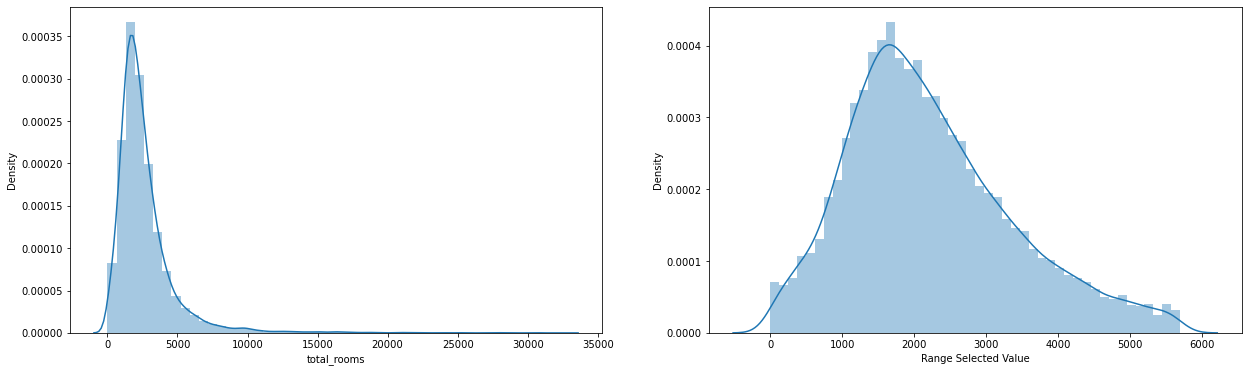

In [26]:
# Filtering to data
df_model = df_model[(df_model['total_rooms'] <= 5693.5)]

# distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total_rooms')
axes[1].set_xlabel('Range Selected Value');

In [27]:
# Statistic Description after total_rooms filtering
df_model['total_rooms'].describe()

count    13548.000000
mean      2224.529156
std       1155.092919
min          2.000000
25%       1407.000000
50%       2032.000000
75%       2891.250000
max       5693.000000
Name: total_rooms, dtype: float64

**Total Bedrooms**

In [28]:
# Statistic Description in total_rooms

df_model['total_bedrooms'].describe()

count    13548.000000
mean       462.334071
std        252.125627
min          1.000000
25%        288.000000
50%        419.000000
75%        593.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [29]:
# Check total_bedrooms > 1168.5
df_model[df_model['total_bedrooms'] > 1168.5].count()['total_bedrooms']

209

Because the nature of total_bedroom and total_room are usually same. We also conclude that 75\% data in feature total_bedrooms are below 593, while the max value are 2610. This feature are also has a positive skewness in the distribution and 209 data are over 1168.5(upper limit). Therefore, we will exclude the data that has value over the upper limit so the skewness of the distribution will reduced.

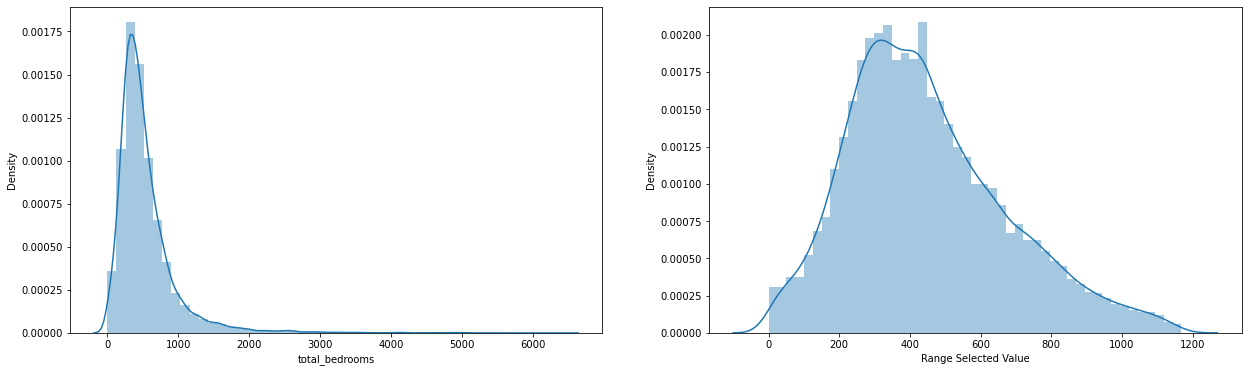

In [30]:
# Filtering to data
df_model = df_model[(df_model['total_bedrooms'] <= 1168.5)]

# distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('total_bedrooms')
axes[1].set_xlabel('Range Selected Value');

**Population**

In [31]:
# Statistic Description in population

df_model['population'].describe()

count    13339.000000
mean      1214.917535
std        669.791576
min          3.000000
25%        760.000000
50%       1103.000000
75%       1563.000000
max       8733.000000
Name: population, dtype: float64

In [32]:
# Cek population > 3134

df_model[df_model['population'] > 3134].count()['population']

173

The population feature also have a positive skewness and number of outliers are around 1/%, , we decided to drop any population over 3134(upper limit).

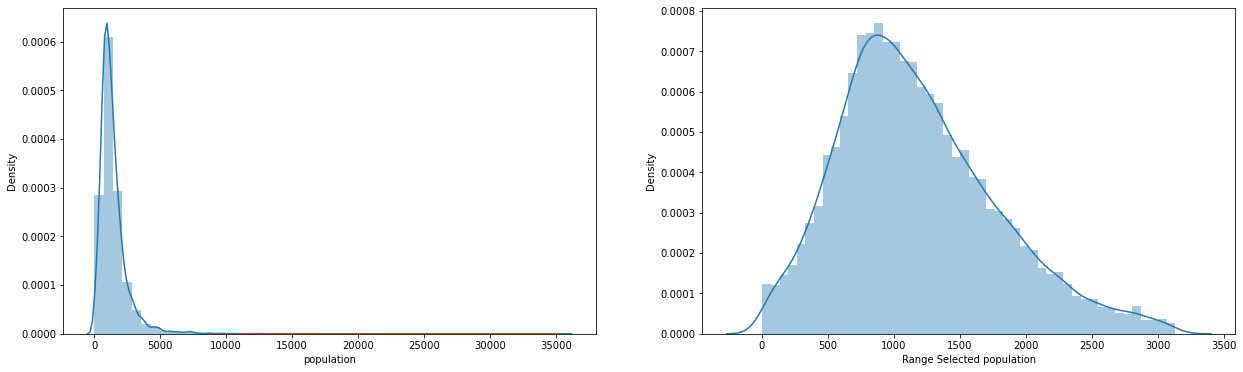

In [33]:
# Filtering to data
df_model = df_model[(df_model['population'] <= 3134)]

# distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('population')
axes[1].set_xlabel('Range Selected population');

**Households**

In [34]:
# Statistic Description in households

df_model['households'].describe()

count    13166.000000
mean       414.824776
std        205.541985
min          1.000000
25%        268.000000
50%        386.000000
75%        540.000000
max       1144.000000
Name: households, dtype: float64

In [35]:
# Check households > 1091.5
df_model[df_model['households'] > 1091.5].count()['households']

3

Since the household outliers are too small (below 1/%), we decided to drop the outliers. This should decrease the distribution skewness.

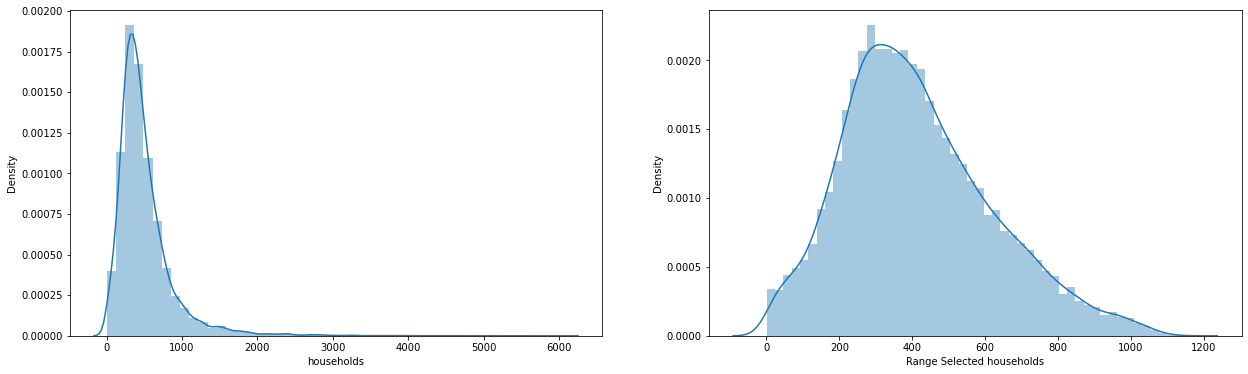

In [36]:
# Filtering to data
df_model = df_model[(df_model['households'] <= 3134)]

# distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('households')
axes[1].set_xlabel('Range Selected households');

**Median House Value**

In [37]:
# Statistic Description in median_house_value

df_model['median_house_value'].describe()

count     13166.000000
mean     205112.228999
std      115589.414345
min       14999.000000
25%      117100.000000
50%      178200.000000
75%      261900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [38]:
# Check median_house_value > 480350
df_model[df_model['median_house_value'] > 480350].count()['median_house_value']

680

The outliers value are mainly from value around 500,000 and the model we create are designed to predict in a certain range of data, we decided to drop the outliers.

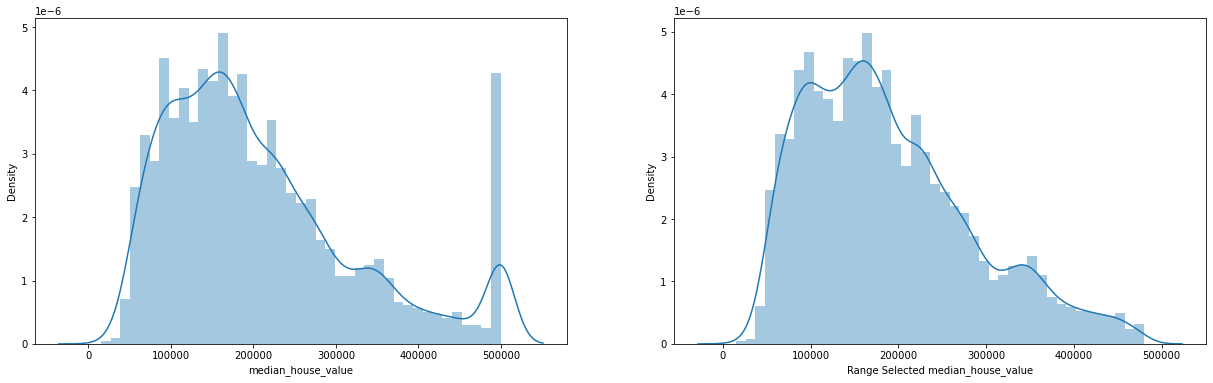

In [39]:
# Filtering to data
df_model = df_model[(df_model['median_house_value'] <= 480350)]

# distribution plot before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value');

**Clean Dataset**

In [40]:
# Check cleaned dataset
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0


In [41]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12486 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12486 non-null  float64
 1   latitude            12486 non-null  float64
 2   housing_median_age  12486 non-null  float64
 3   total_rooms         12486 non-null  float64
 4   total_bedrooms      12486 non-null  float64
 5   population          12486 non-null  float64
 6   households          12486 non-null  float64
 7   median_income       12486 non-null  float64
 8   ocean_proximity     12486 non-null  object 
 9   median_house_value  12486 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### **Modeling**

In [43]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding & Scaling**

To make use of all feature, the categorical feature must be encoded to numerical. We can use ColumnTransformer to encode the feature, which we will apply pipeline.

"ocean_proximity" feature will be encoded using binary encoder rather than one hot encoder to reduce the number of feature. Since if we use one hot it will create 4 feature where if binary encoder used, we will generate 3 feature.

In [44]:
# Encode feature

transformer = ColumnTransformer([
    ('Binary', ce.BinaryEncoder(), ['ocean_proximity']),
], remainder='passthrough')

**Data Splitting**

Split and create 2 new dataframe:
- Dependent variable: "median_house_value"
- Independent variable: "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"

In [45]:
# Split the Data between dependent variable and independent variable

X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

We split the data to train dataset and test dataset, since we are doing supervised learning regression, there is no need to stratify the data.

In [46]:
# Splitting training data and test data with 70:30 proportion

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=26)

**Choose a Benchmark Model**

In [47]:
# Define the ML Algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


# define Scaler, 
scaler = StandardScaler()

# Score Metric
models = [lr, knn, dt, rf, xgb]

score_rmse = []
score_mean_rmse = []
score_std_rmse = []

score_mae = []
score_mean_mae = []
score_std_mae = []

score_mape = []
score_mean_mape = []
score_std_mape = []

# Algorithm based on score
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    score_mean_rmse.append(model_cv_rmse.mean())
    score_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    score_mean_mae.append(model_cv_mae.mean())
    score_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    score_mean_mape.append(model_cv_mape.mean())
    score_std_mape.append(model_cv_mape.std())

[-57138.56198703 -58305.25959342 -56994.26946926 -55160.43107608
 -60639.97802837] LinearRegression()
[-42622.23073756 -43905.81012823 -42495.04959003 -41615.04791762
 -44492.67943421] LinearRegression()
[-0.2719073  -0.27543081 -0.26087069 -0.25773762 -0.28762916] LinearRegression()
[-54056.40523621 -56609.19185819 -55362.51041541 -52673.84205551
 -57799.71715307] KNeighborsRegressor()
[-37769.17608696 -40134.19919908 -38957.58581236 -37369.13100686
 -39620.06922197] KNeighborsRegressor()
[-0.22207919 -0.23070615 -0.22417843 -0.21743197 -0.24410957] KNeighborsRegressor()
[-62399.18246601 -62350.74002707 -63792.64902722 -62168.59919492
 -66733.71363464] DecisionTreeRegressor(random_state=1)
[-42398.51315789 -42639.35983982 -43539.13157895 -41298.45594966
 -44242.27745995] DecisionTreeRegressor(random_state=1)
[-0.25281924 -0.24951712 -0.24676879 -0.24208756 -0.28810893] DecisionTreeRegressor(random_state=1)
[-45588.70498506 -44950.97464449 -44846.84094288 -44043.22165442
 -49990.123985

In [48]:
# Compare result from choosen algorithm
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': score_mean_rmse,
    'Std_RMSE': score_std_rmse,
    'Mean_MAE': score_mean_mae,
    'Std_MAE': score_std_mae,
    'Mean_MAPE': score_mean_mape,
    'Std_MAPE': score_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57647.700031,1803.264378,-43026.163562,1035.464922,-0.270715,0.010724
1,KNN Regressor,-55300.333344,1811.613074,-38770.032265,1056.686142,-0.227701,0.009249
2,DecisionTree Regressor,-63488.976870,1723.204318,-42823.547597,1006.512672,-0.255860,0.016503
3,RandomForest Regressor,-45883.973242,2111.025981,-31375.041130,1072.050600,-0.190704,0.014967
4,XGBoost Regressor,-44285.765068,1247.428012,-30585.436724,631.376031,-0.185477,0.010846


From the result, we can conclude that XGBoost give the best result since the error are lower than other. The second good model are random forest since the amount of error are slightly better than XGBoost. We decide to use XGBoost and Random Forest model predict the test set and compare it, then we will choose the model based on its score.

**Predict Test Set with the Benchmark Model**

In [49]:
# Benchmark test between 2 best model

models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,45289.220057,30573.502883,0.180877
RandomForest,46514.313618,31312.895868,0.185822


From the test result, the XGBoost give us slightly better score than Random Forest. We conclude XGBoost as the best model.

**Hyperparameter Tuning**

Since we will be using XGBoost as our final model. We will perform hyperparameter tuning to the model with our expectation that it will increase the model performance.

In [50]:
# Depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# number of tree
n_estimators = list(np.arange(100, 201))

# Number of row in each tree
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Total feature that used from each tree
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [51]:
# Benchmark model with Hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Creating Algorithm Chain
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # only choose 1 metric for optimisation
    random_state = 1  
)

In [52]:
# Fitting training dataset to find best parameter
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                   

In [53]:
# Creating dataframe for better visualisation
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,3.482467,0.654351,0.045677,0.014458,0.9,0.059948,119,8,0.05,5,...,714.594223,1,-0.173977,-0.172259,-0.167560,-0.166665,-0.194636,-0.175019,0.010188,1
20,1.685645,0.177292,0.023138,0.002309,0.9,0.007743,143,4,0.38,6,...,632.974728,2,-0.189901,-0.189638,-0.187477,-0.186558,-0.213531,-0.193421,0.010135,3
17,3.035316,0.150838,0.028324,0.004746,0.6,0.001,190,5,0.04,9,...,1034.960294,3,-0.190713,-0.189454,-0.190234,-0.179719,-0.215713,-0.193167,0.011980,2
3,2.275646,0.208870,0.033510,0.002054,0.5,0.021544,166,8,0.1,9,...,1038.457810,5,-0.199111,-0.196641,-0.196021,-0.187592,-0.222117,-0.200297,0.011581,4
8,3.104145,0.417265,0.031915,0.005747,0.7,0.021544,182,6,0.31,2,...,1055.644535,4,-0.197022,-0.196869,-0.194009,-0.187702,-0.227727,-0.200666,0.013946,5


In [54]:
# Check Score and best parameter
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43135.54616516562
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict Test Set with the Tuned Model**

Predict the test set using the XGBoost with choosen parameter in hyperparameter tuning.

In [55]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,44258.43431,29822.786268,0.174783


**Performance Comparison**

Performance comparison before and after hyperparameter tuning.

In [56]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,45289.220057,30573.502883,0.180877


In [57]:
# After hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,44258.43431,29822.786268,0.174783


The model after hyperparameter tuning has a slightly better score. This proven by the lower RMSE, MAE &, MAPE.

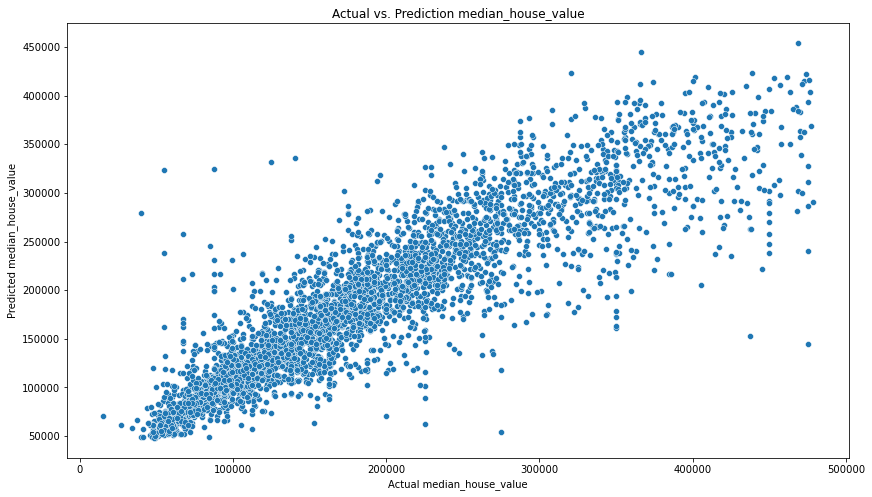

In [58]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction median_house_value', 
                                               xlabel='Actual median_house_value', 
                                               ylabel='Predicted median_house_value');

There are some big error that create a significant difference between RMSE and MAE. This are explained by the plot, where there are predicted value are estimated higher than actual value (overestimate), and vice versa. The MAPE around 17% making this a "good forecasting" model (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

To get to know which feature that affect the target variable (median_house_value), we can check it from its feature importance.

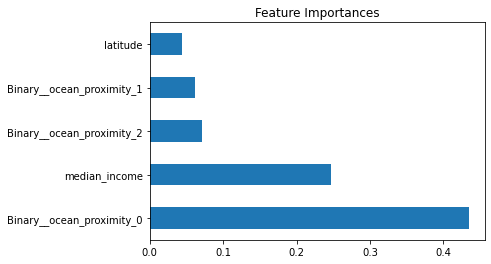

In [59]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

After modeling, we know that "ocean_proximity_0" and "median_income" are to most influential to the "median_house_value".

We use RMSE, MAE, & MAPE as our evaluation metric. The RMSE we get is 44,258 from hyperparameter tuning, and conclude that the model only can predict in a certain range of number (maximal amount are 480,350), therefore the predict value will have variance more or less around 44,258 But there's still a chance that the predict value are deviated from the variance range due to the bias result from the model based on actual vs predicted plot above. This bias is resulted by the number of feature from the dataset that could represent the target variable.

### **Recommendation**

There are several things that could increase the model performance, which is:

1. Increase the feature variable that have a high correlation to target variable ("median_house_value").
<br><br>
1. Add more data to the listing beside from normal distribution, to increase the performance of the model.
<br><br>
1. This model could be use to develop a newer model. Like to predict a new listing beyond this dataset.

#### **Save Model**

In [65]:
#Save model
#import pickle

#estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
#estimator.fit(X_train, y_train)

#pickle.dump(estimator, open('Model_California_House_Pricing_XGB.sav', 'wb'))

In [61]:
#Load model
# filename = 'Model_California_House_Pricing_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [62]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))